In [ ]:
#執行第一步前先用  !ls 確認自己是否在content/ 這個目錄底下

# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 13939 (delta 9), reused 16 (delta 8), pack-reused 13914
Receiving objects: 100% (13939/13939), 12.46 MiB | 5.80 MiB/s, done.
Resolving deltas: 100% (9518/9518), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (build) 在darknet目錄底下
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
%cd ../ 
!ls

/content
darknet  sample_data


In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# 假如我的google drive有用labelIMG做的txt和img 加壓縮檔
!cp ./drive/"My Drive"/missile.zip ./darknet

In [ ]:
#!unzip ./darknet/missile.zip -d ./darknet/data/  原本
!unzip ./darknet/missile.zip -d ./darknet/data/obj  #多加obj在data目錄底下

Archive:  ./darknet/missile.zip
  inflating: ./darknet/data/missile1.JPG  
  inflating: ./darknet/data/missile1.txt  
  inflating: ./darknet/data/missile1.xml  
  inflating: ./darknet/data/missile10.JPG  
  inflating: ./darknet/data/missile10.txt  
  inflating: ./darknet/data/missile10.xml  
  inflating: ./darknet/data/missile11.JPG  
  inflating: ./darknet/data/missile11.txt  
  inflating: ./darknet/data/missile11.xml  
  inflating: ./darknet/data/missile12.JPG  
  inflating: ./darknet/data/missile12.txt  
  inflating: ./darknet/data/missile12.xml  
  inflating: ./darknet/data/missile13.JPG  
  inflating: ./darknet/data/missile13.txt  
  inflating: ./darknet/data/missile13.xml  
  inflating: ./darknet/data/missile14.JPG  
  inflating: ./darknet/data/missile14.txt  
  inflating: ./darknet/data/missile14.xml  
  inflating: ./darknet/data/missile15.JPG  
  inflating: ./darknet/data/missile15.txt  
  inflating: ./darknet/data/missile15.xml  
  inflating: ./darknet/data/missile16.JPG  
  i

In [ ]:
# 假如我的google drive有cfg檔案
!cp ./drive/"My Drive"/yolov3/yolov3_custom.cfg ./darknet/cfg/yolov3_custom.cfg

In [ ]:
# 假如我的google drive有obj.names和obj.data檔案  備註:這兩個檔都需要看情況 需要做點修改
!cp ./drive/"My Drive"/yolov3/obj.names ./darknet/data
!cp ./drive/"My Drive"/yolov3/obj.data  ./darknet/data

In [ ]:
# 假如我的google drive有generate_train.py檔案
!cp ./drive/"My Drive"/yolov3/generate_train.py ./darknet

In [ ]:
%cd ./darknet
!python generate_train.py
#匯入檔案是在darknet/data/obj  匯出檔案是在darknet/data/
%cd ../

/content/darknet
Traceback (most recent call last):
  File "generate_train.py", line 4, in <module>
    os.chdir(os.path.join("data", "obj"))
FileNotFoundError: [Errno 2] No such file or directory: 'data/obj'
/content


In [ ]:
!ls ./darknet/data/
#確認有沒有train.txt檔案

9k.tree			  missile12.xml  missile19.JPG	missile6.txt
coco9k.map		  missile13.JPG  missile19.txt	missile6.xml
coco.names		  missile13.txt  missile19.xml	missile7.JPG
dog.jpg			  missile13.xml  missile1.JPG	missile7.txt
eagle.jpg		  missile14.JPG  missile1.txt	missile7.xml
giraffe.jpg		  missile14.txt  missile1.xml	missile8.JPG
goal.txt		  missile14.xml  missile2.JPG	missile8.txt
horses.jpg		  missile15.JPG  missile2.txt	missile8.xml
imagenet.labels.list	  missile15.txt  missile2.xml	missile9.JPG
imagenet.shortnames.list  missile15.xml  missile3.JPG	missile9.txt
labels			  missile16.JPG  missile3.txt	missile9.xml
missile10.JPG		  missile16.txt  missile3.xml	obj.data
missile10.txt		  missile16.xml  missile4.JPG	obj.names
missile10.xml		  missile17.JPG  missile4.txt	openimages.names
missile11.JPG		  missile17.txt  missile4.xml	person.jpg
missile11.txt		  missile17.xml  missile5.JPG	scream.jpg
missile11.xml		  missile18.JPG  missile5.txt	voc.names
missile12.JPG		  missile18.txt  missile5.x

In [ ]:
%cd ./darknet
!wget http://pjreddie.com/media/files/darknet53.conv.74
%cd ../

/content/darknet
--2020-05-09 09:42:41--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2020-05-09 09:42:42--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   405KB/s    in 6m 55s  

2020-05-09 09:49:38 (383 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]

/content


In [ ]:
%cd ./darknet
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show
#%cd ../

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.886265, GIOU: 0.885128), Class: 0.999954, Obj: 0.996759, No Obj: 0.000256, .5R: 1.000000, .75R: 1.000000, count: 4, class_loss = 0.000174, iou_loss = 0.035535, total_loss = 0.035709 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000001, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000000, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.843434, GIOU: 0.840205), Class: 0.999757, Obj: 0.938121, No Obj: 0.000490, .5R: 1.000000, .75R: 1.000000, count: 7

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

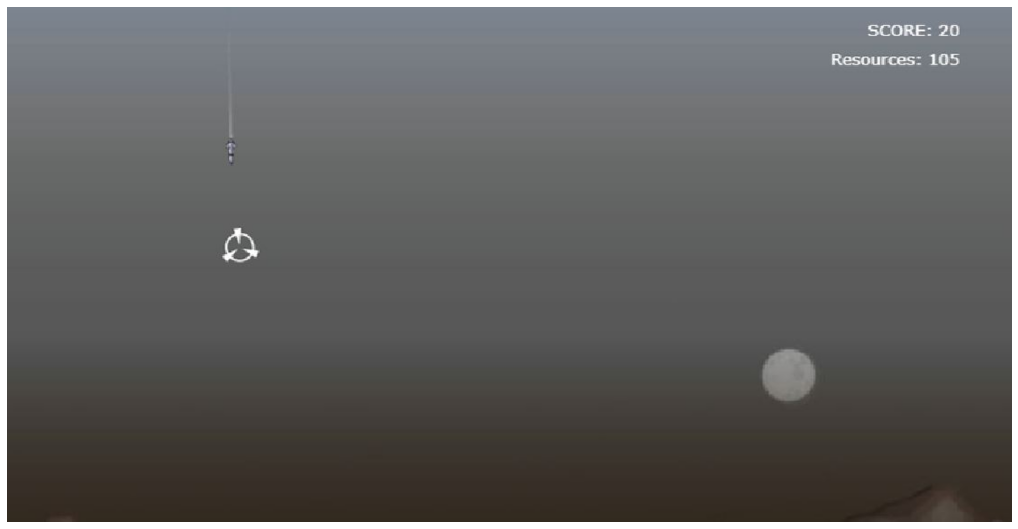

In [ ]:
imShow("./darknet/data/obj/missile1.JPG")

In [ ]:
# run darknet detection
#!./darknet detect 自己的cfg路徑 自己的weights路徑 data/scream.jpg